In [ ]:
pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=8975fb132f23f4791e943e43719267bd4493ddb4585b75e439afce5c3562e277
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [ ]:
pip install plotly

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go

In [ ]:
vest_df = yf.download('VESTL.IS',
                       start = '2017-01-01',
                       progress = False)

vest_df.index = pd.to_datetime(vest_df.index)

In [ ]:
vest_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,6.340000,6.460000,6.320000,6.430000,5.063399,5979165
2017-01-03,6.450000,6.470000,6.300000,6.310000,4.968904,9667099
2017-01-04,6.330000,6.350000,6.160000,6.180000,4.866533,6555520
2017-01-05,6.210000,6.250000,6.120000,6.170000,4.858659,4716446
2017-01-06,6.170000,6.230000,6.140000,6.210000,4.890157,3835989
...,...,...,...,...,...,...
2024-03-19,75.400002,77.199997,75.000000,77.000000,77.000000,2698963
2024-03-20,77.000000,78.099998,76.000000,78.000000,78.000000,2642935
2024-03-21,78.199997,85.800003,77.050003,85.800003,85.800003,37815261


In [ ]:
##Veri Görselleştirme

In [ ]:
#Plotly kütüphanesini kullanarak bir mum çubuğu grafiği oluşturur.
#go.Candlestick objesi, mum çubuğu grafiği oluşturmak için kullanılır.
fig = go.Figure(data=[go.Candlestick(x=vest_df.index,
                                     open = vest_df['Open'],
                                     high = vest_df['High'],
                                     low = vest_df['Low'],
                                     close = vest_df['Close'])])

In [ ]:
fig.show()

In [ ]:
##Tanımlayıcı istatistikler

In [ ]:
vest_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1.843000e+03
mean,24.301611,24.860488,23.779023,24.256902,22.380748,9.096506e+06
std,19.589729,20.147038,19.034454,19.543189,20.222626,1.036124e+07
min,5.320000,5.350000,5.250000,5.260000,4.142066,0.000000e+00
25%,9.050000,9.280000,8.890000,9.015000,7.098996,3.860258e+06
50%,16.610001,17.090000,16.420000,16.680000,13.134914,6.090072e+06
75%,30.630000,31.290000,30.139999,30.680000,27.450000,1.051473e+07
max,95.550003,98.699997,89.800003,95.550003,95.550003,1.261160e+08


In [ ]:
##Hareketli Ortalama

In [ ]:
close_app = vest_df.iloc[len(vest_df)//2:,3]

In [ ]:
close_app

Date
2020-07-24    17.870001
2020-07-27    17.840000
2020-07-28    17.600000
2020-07-29    17.850000
2020-07-30    17.520000
                ...    
2024-03-19    77.000000
2024-03-20    78.000000
2024-03-21    85.800003
2024-03-22    83.000000
2024-03-25    79.500000
Name: Close, Length: 922, dtype: float64

In [ ]:
# 5 günlük ortalama
rolling_app5 = close_app.rolling(window=5).mean()

In [ ]:
# 14 günlük ortalama
rolling_app14 = close_app.rolling(window=14).mean()

In [ ]:
# 21 günlük ortalama
rolling_app21 = close_app.rolling(window=21).mean()

In [ ]:
MAs = pd.concat([close_app,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns = ['Close','Short','Mid','Long']
MAs.head(25)

,Close,Short,Mid,Long
Date,,,,
2020-07-24,17.870001,NaN,NaN,NaN
2020-07-27,17.840000,NaN,NaN,NaN
2020-07-28,17.600000,NaN,NaN,NaN
2020-07-29,17.850000,NaN,NaN,NaN
2020-07-30,17.520000,17.736000,NaN,NaN
2020-08-04,16.620001,17.486000,NaN,NaN
2020-08-05,16.379999,17.194000,NaN,NaN
2020-08-06,15.020000,16.678000,NaN,NaN
2020-08-07,15.700000,16.248000,NaN,NaN


In [ ]:
##DataFrame içindeki NaN değerleri (dropna), yani eksik verileri kaldırır.
##axis = 0 argümanı, satırları (gözlemleri) işaret eder
MAs.dropna(axis = 0, inplace = True)
MAs.head()

,Close,Short,Mid,Long
Date,,,,
2020-08-25,16.490000,16.676000,16.238572,16.620000
2020-08-26,17.120001,16.860000,16.388572,16.584286
2020-08-27,17.540001,16.958001,16.520000,16.570000
2020-08-28,17.959999,17.146000,16.649286,16.587143
2020-08-31,18.389999,17.500000,16.771429,16.612857


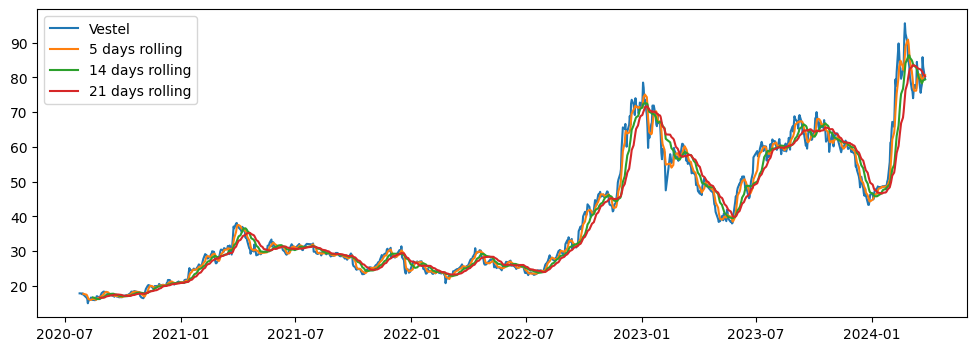

In [ ]:
##figsize=(20,10) parametresi, grafiğin genişliğini ve yüksekliğini belirler.
##Her ax.plot çağrısı, bir çizgi çizmek için gereken verileri ve çizginin etiketini içerir.
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(close_app.index, close_app, label='Vestel')
ax.plot(rolling_app5.index, rolling_app5, label='5 days rolling')
ax.plot(rolling_app14.index, rolling_app14, label='14 days rolling')
ax.plot(rolling_app21.index, rolling_app21, label='21 days rolling')
ax.legend(loc='upper left')

In [ ]:
MAs['Short']-MAs['Mid']

Date
2020-08-25    0.437429
2020-08-26    0.471429
2020-08-27    0.438000
2020-08-28    0.496714
2020-08-31    0.728571
                ...   
2024-03-19    0.527857
2024-03-20    0.068572
2024-03-21    0.625001
2024-03-22    0.730715
2024-03-25    1.270714
Length: 902, dtype: float64

In [ ]:
np.array(MAs['Short']-MAs['Mid'])

array([ 4.37428638e-01,  4.71428626e-01,  4.38000311e-01,  4.96714360e-01,
        7.28571279e-01,  9.76857144e-01,  1.03028559e+00,  1.01414261e+00,
        9.10857201e-01,  6.63143049e-01,  3.95714351e-01,  1.98000009e-01,
       -6.99994223e-03, -2.33000183e-01, -4.08428873e-01, -4.74000141e-01,
       -4.65000098e-01, -4.84571838e-01, -4.27143206e-01, -3.79714339e-01,
       -3.20428658e-01, -2.67714446e-01, -1.81857027e-01, -2.32714054e-01,
       -2.10857119e-01, -2.38999912e-01, -1.79142679e-01, -8.17143304e-02,
        2.57126944e-03,  8.35713523e-02,  1.99285643e-01,  1.90856934e-01,
        2.25285394e-01,  2.51428277e-01,  3.18999808e-01,  3.75999832e-01,
        4.57714135e-01,  5.50857135e-01,  6.13000052e-01,  6.16571372e-01,
        5.85857255e-01,  5.00000191e-01,  4.18285942e-01,  3.24428913e-01,
        1.94286074e-01,  1.00143160e-01, -1.42285265e-01, -4.19856780e-01,
       -6.64571217e-01, -8.40571322e-01, -8.38428361e-01, -5.76428577e-01,
       -1.44285910e-01,  

In [ ]:
# Short ve Mid değerleri arasındaki tüm değerler içindeki en küçük %10. değeri
##Amaç uzaklıklar arasındaki optimum uzaklık
np.abs(np.percentile(np.array(MAs['Short']-MAs['Mid']),10))

2.0664288820539207

In [ ]:
def buy_sell(data, perc = 10):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42
  sm = np.abs(np.percentile(np.array(data['Short']-data['Mid']),perc))
  sl = np.abs(np.percentile(np.array(data['Short']-data['Long']),perc))


  for i in range(0,len(data)):
    if (data['Short'][i] > data['Mid'][i]+sm) & (data['Short'][i] > data['Long'][i]+sl):
      buy_signal.append(np.nan)
      if flag != 1:
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['Short'][i] < data['Mid'][i]-sm ) & (data['Short'][i] < data['Long'][i]-sl):
      sell_signal.append(np.nan)
      if flag != 0:
        buy_signal.append(data['Close'][i])
        buy_sell.append(-data['Close'][i])
        flag = 0
      else :
        buy_signal.append(np.nan)
    else :
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
      buy_sell.append(np.nan)
  operations = np.array(buy_sell)
  operations = operations[~np.isnan(operations)]
  return buy_signal, sell_signal

In [ ]:
#Satış-alış
m=buy_sell(MAs)
m

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,

In [ ]:
MAs.tail()

,Close,Short,Mid,Long
Date,,,,
2024-03-19,77.000000,79.160001,78.632144,82.028572
2024-03-20,78.000000,78.340001,78.271429,81.790477
2024-03-21,85.800003,79.300002,78.675001,81.528572
2024-03-22,83.000000,79.870001,79.139287,80.930953
2024-03-25,79.500000,80.660001,79.389287,80.307143


In [ ]:
m[0]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [ ]:
m[1]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 37.959999084472656,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 

In [ ]:
MAs['BUY']=m[0]
MAs['SELL']=m[1]

<function matplotlib.pyplot.show(close=None, block=None)>

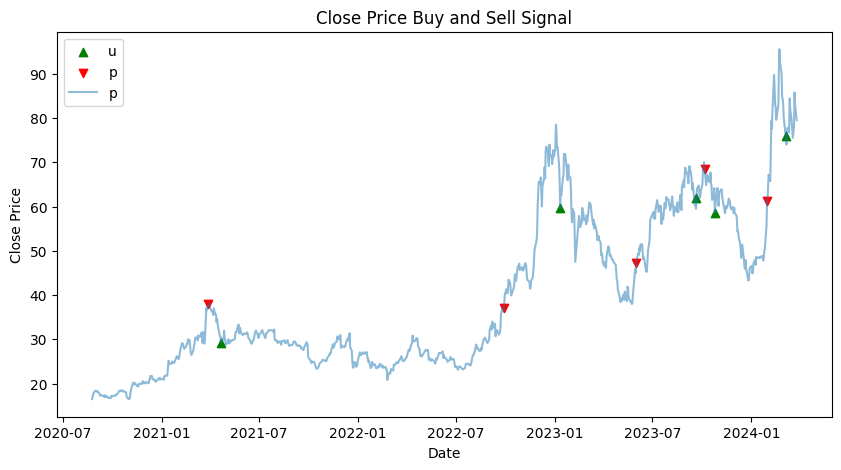

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(MAs.index, MAs['BUY'], color = 'green', label = 'BUY', marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs['SELL'], color = 'red', label = 'SELL', marker = 'v', alpha = 1)
plt.plot(MAs['Close'], label = 'Close Price', alpha = 0.5)
plt.title('Close Price Buy and Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend('upper left')
plt.show

In [ ]:
 neg = 0
  pos = 0
  for i in range(len(operations)):
    if operations[i] < 0:
      neg = i
      break
  for i in range(1,len(operations)):
    if operations[-i] > 0:
      pos = i-1
      break
  operations = operations[neg:-pos]
  PL = np.sum(operations)

  return (buy_signal,sell_signal, PL)